In [88]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
#주어진 자료
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
x = x.reshape(-1,1)
ones= torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=-1)
ϵ = torch.randn(100).reshape(-1,1)*0.5
y = 2.5+ 4*x + ϵ

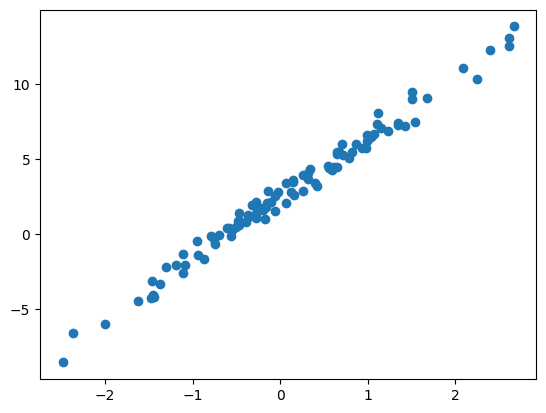

In [90]:
plt.plot(x,y,'o')

가중치가 [[-5,0],[10]] 인 최초의 직선을 만들어라

In [91]:
weight = torch.tensor([[-5.0],[10.0]], requires_grad = True)

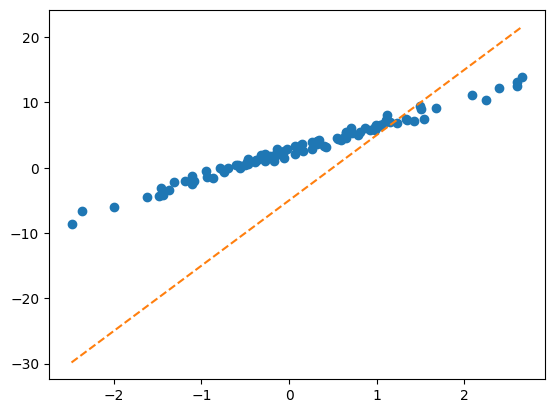

In [92]:
yhat1 = X@weight
plt.plot(x,y,'o')
plt.plot(x,yhat1.data,'--')

`torch.optim.SGD`를 이용하여 What을 update하라. 학습률은 0.1로 설정하고
30회 update하라.

In [93]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([weight],lr = 0.1) #리스트꼴로 넣었다는게 기억이 남..

In [94]:
for epoc in range(30):
  #1
  yhat = X@weight
  #2
  loss = loss_fn(yhat,y)
  #3
  loss.backward()
  #4
  optimizr.step()
  optimizr.zero_grad()

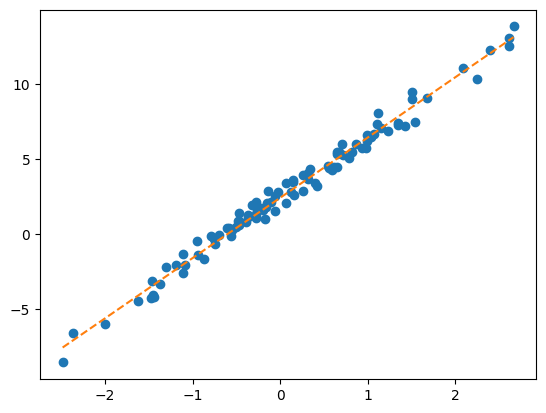

In [95]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')

In [96]:
#가중치를 따로 선언하고 한번에 학습하는 법
w = torch.tensor(10.0, requires_grad = True) #float형 넣을것..
b = torch.tensor(-5.0, requires_grad = True)

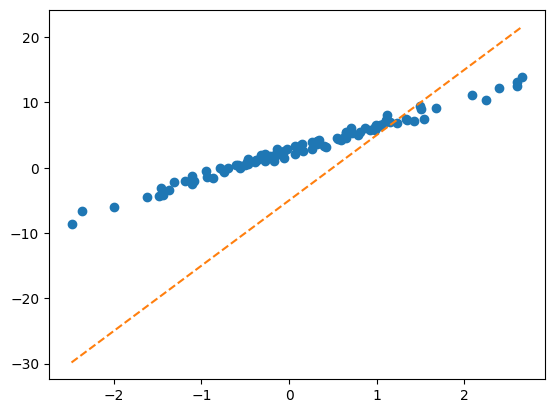

In [97]:
plt.plot(x,y,'o')
plt.plot(x, (w*x + b).data , '--') #일관성있게... 시각화 할 땐 미분 꼬리표 제거

`torch.optim.SGD`를 이용하여 What을 update하라. 학습률은 0.1로 설정하고
30회 update하라.

In [98]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([w,b] , lr = 0.1) #따로따로 정의된 w,b이지만 리스트로 한번에 optimizr에 선언

In [99]:
for epoc in range(30):
  ##1
  yhat = w*x + b
  ##2
  loss = loss_fn(yhat, y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

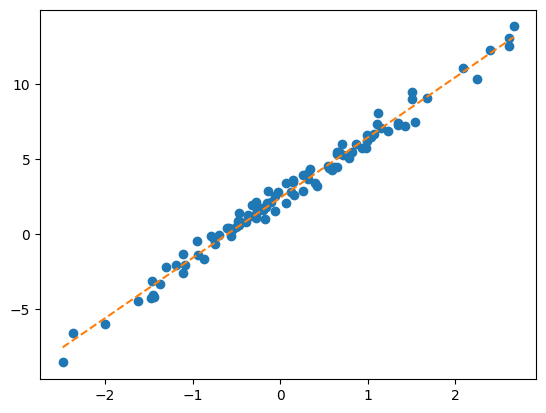

In [100]:
plt.plot(x,y,'o')
plt.plot(x,(w*x + b).data , '--')

### MF-based 추천 시스템

In [101]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_view

,영식(IN),영철(IN),영호(IS),광수(IS),상철(EN),영수(EN),규빈(ES),다호(ES)
옥순(IN),NaN,4.02,3.45,3.42,0.84,1.12,0.43,0.49
영자(IN),3.93,3.99,3.63,3.43,0.98,0.96,0.52,NaN
정숙(IS),3.52,3.42,4.05,4.06,0.39,NaN,0.93,0.99
영숙(IS),3.43,3.57,NaN,3.95,0.56,0.52,0.89,0.89
순자(EN),1.12,NaN,0.59,0.43,4.01,4.16,3.52,3.38
현숙(EN),0.94,1.05,0.32,0.45,4.02,3.78,NaN,3.54
서연(ES),0.51,0.56,0.88,0.89,3.50,3.64,4.04,4.10
보람(ES),0.48,0.51,1.03,NaN,3.52,4.00,3.82,NaN
하니(I),4.85,4.82,NaN,4.98,4.53,4.39,4.45,4.52


In [102]:
#(1) 옥순(IN)과 영식(IN)의 궁합  ≈  옥순의I성향 × 영식의I성향  +  옥순의N성향 × 영식의N성향  +  옥순의매력  +  영식의매력
옥순궁합 = torch.tensor([1.22,0.49]).reshape(1,2)
옥순매력 = torch.tensor(1.21)
영식궁합 = torch.tensor([1.20, 0.5]).reshape(1,2)
영식매력 = torch.tensor(1.2)

In [103]:
옥순궁합@영식궁합.T + 옥순매력 + 영식매력 #트랜스포즈를 활용한 내적..

tensor([[4.1190]])

In [104]:
(옥순궁합*영식궁합).sum() + 옥순매력 + 영식매력 #엘레먼트 와이즈하게 곱하고 더함. 내적과 같음.

tensor(4.1190)

In [105]:
#전체 사용자 설정값
#여성 관련 값
옥순성향 = torch.tensor([1.22,0.49]).reshape(1,2)
영자성향 = torch.tensor([1.17,0.44]).reshape(1,2)
정숙성향 = torch.tensor([1.21,-0.45]).reshape(1,2)
영숙성향 = torch.tensor([1.20,-0.50]).reshape(1,2)
순자성향 = torch.tensor([-1.20,0.51]).reshape(1,2)
현숙성향 = torch.tensor([-1.23,0.48]).reshape(1,2)
서연성향 = torch.tensor([-1.20,-0.48]).reshape(1,2)
보람성향 = torch.tensor([-1.19,-0.49]).reshape(1,2)
하니성향 = torch.tensor([0.2,0]).reshape(1,2)
W = torch.concat([옥순성향,영자성향,정숙성향,영숙성향,순자성향,현숙성향,서연성향,보람성향,하니성향]) #여성들의 성향,
b1 = torch.tensor([1.21,1.25,1.10,1.11,1.12,1.13,1.14,1.12,3.6]).reshape(-1,1) #절대매력..

#남성 관련 값
영식성향 = torch.tensor([1.20,0.5]).reshape(1,2)
영철성향 = torch.tensor([1.22,0.45]).reshape(1,2)
영호성향 = torch.tensor([1.23,-0.7]).reshape(1,2)
광수성향 = torch.tensor([1.21,-0.6]).reshape(1,2)
상철성향 = torch.tensor([-1.28,0.6]).reshape(1,2)
영수성향 = torch.tensor([-1.24,0.5]).reshape(1,2)
규빈성향 = torch.tensor([-1.20,-0.5]).reshape(1,2)
다호성향 = torch.tensor([-1.22,-0.6]).reshape(1,2)
M = torch.concat([영식성향,영철성향,영호성향,광수성향,상철성향,영수성향,규빈성향,다호성향]) # 각 column은 남성출연자의 성향을 의미함
b2 = torch.tensor([1.2,1.10,1.11,1.25,1.18,1.11,1.15,1.15]).reshape(-1,1) #남성의 절대 매력

In [106]:
#전체적인 궁합 점수를 한번 보자
M.shape , W.shape

(torch.Size([8, 2]), torch.Size([9, 2]))

In [107]:
W@M.T #성향 점수

tensor([[ 1.7090,  1.7089,  1.1576,  1.1822, -1.2676, -1.2678, -1.7090, -1.7824],
        [ 1.6240,  1.6254,  1.1311,  1.1517, -1.2336, -1.2308, -1.6240, -1.6914],
        [ 1.2270,  1.2737,  1.8033,  1.7341, -1.8188, -1.7254, -1.2270, -1.2062],
        [ 1.1900,  1.2390,  1.8260,  1.7520, -1.8360, -1.7380, -1.1900, -1.1640],
        [-1.1850, -1.2345, -1.8330, -1.7580,  1.8420,  1.7430,  1.1850,  1.1580],
        [-1.2360, -1.2846, -1.8489, -1.7763,  1.8624,  1.7652,  1.2360,  1.2126],
        [-1.6800, -1.6800, -1.1400, -1.1640,  1.2480,  1.2480,  1.6800,  1.7520],
        [-1.6730, -1.6723, -1.1207, -1.1459,  1.2292,  1.2306,  1.6730,  1.7458],
        [ 0.2400,  0.2440,  0.2460,  0.2420, -0.2560, -0.2480, -0.2400, -0.2440]])

In [108]:
b1 + b2.T #매력 점수

tensor([[2.4100, 2.3100, 2.3200, 2.4600, 2.3900, 2.3200, 2.3600, 2.3600],
        [2.4500, 2.3500, 2.3600, 2.5000, 2.4300, 2.3600, 2.4000, 2.4000],
        [2.3000, 2.2000, 2.2100, 2.3500, 2.2800, 2.2100, 2.2500, 2.2500],
        [2.3100, 2.2100, 2.2200, 2.3600, 2.2900, 2.2200, 2.2600, 2.2600],
        [2.3200, 2.2200, 2.2300, 2.3700, 2.3000, 2.2300, 2.2700, 2.2700],
        [2.3300, 2.2300, 2.2400, 2.3800, 2.3100, 2.2400, 2.2800, 2.2800],
        [2.3400, 2.2400, 2.2500, 2.3900, 2.3200, 2.2500, 2.2900, 2.2900],
        [2.3200, 2.2200, 2.2300, 2.3700, 2.3000, 2.2300, 2.2700, 2.2700],
        [4.8000, 4.7000, 4.7100, 4.8500, 4.7800, 4.7100, 4.7500, 4.7500]])

In [109]:
W@M.T + b1 + b2.T #성향 + 매력 점수, 실제로 주어진 데이터 프레임의 값과 꽤 유사함..

tensor([[4.1190, 4.0189, 3.4776, 3.6422, 1.1224, 1.0522, 0.6510, 0.5776],
        [4.0740, 3.9754, 3.4911, 3.6517, 1.1964, 1.1292, 0.7760, 0.7086],
        [3.5270, 3.4737, 4.0133, 4.0841, 0.4612, 0.4846, 1.0230, 1.0438],
        [3.5000, 3.4490, 4.0460, 4.1120, 0.4540, 0.4820, 1.0700, 1.0960],
        [1.1350, 0.9855, 0.3970, 0.6120, 4.1420, 3.9730, 3.4550, 3.4280],
        [1.0940, 0.9454, 0.3911, 0.6037, 4.1724, 4.0052, 3.5160, 3.4926],
        [0.6600, 0.5600, 1.1100, 1.2260, 3.5680, 3.4980, 3.9700, 4.0420],
        [0.6470, 0.5477, 1.1093, 1.2241, 3.5292, 3.4606, 3.9430, 4.0158],
        [5.0400, 4.9440, 4.9560, 5.0920, 4.5240, 4.4620, 4.5100, 4.5060]])

In [110]:
print(f"참값 : \n{np.array(df_view)}") #f-string과 \r 엔터를 한번 실행한 것을 출력
print(f"만든 값 : \n{np.array(W@M.T + b1 + b2.T).round(2)}")

참값 : 
[[ nan 4.02 3.45 3.42 0.84 1.12 0.43 0.49]
 [3.93 3.99 3.63 3.43 0.98 0.96 0.52  nan]
 [3.52 3.42 4.05 4.06 0.39  nan 0.93 0.99]
 [3.43 3.57  nan 3.95 0.56 0.52 0.89 0.89]
 [1.12  nan 0.59 0.43 4.01 4.16 3.52 3.38]
 [0.94 1.05 0.32 0.45 4.02 3.78  nan 3.54]
 [0.51 0.56 0.88 0.89 3.5  3.64 4.04 4.1 ]
 [0.48 0.51 1.03  nan 3.52 4.   3.82  nan]
 [4.85 4.82  nan 4.98 4.53 4.39 4.45 4.52]]
만든 값 : 
[[4.12 4.02 3.48 3.64 1.12 1.05 0.65 0.58]
 [4.07 3.98 3.49 3.65 1.2  1.13 0.78 0.71]
 [3.53 3.47 4.01 4.08 0.46 0.48 1.02 1.04]
 [3.5  3.45 4.05 4.11 0.45 0.48 1.07 1.1 ]
 [1.14 0.99 0.4  0.61 4.14 3.97 3.46 3.43]
 [1.09 0.95 0.39 0.6  4.17 4.01 3.52 3.49]
 [0.66 0.56 1.11 1.23 3.57 3.5  3.97 4.04]
 [0.65 0.55 1.11 1.22 3.53 3.46 3.94 4.02]
 [5.04 4.94 4.96 5.09 4.52 4.46 4.51 4.51]]


In [111]:
#생각해볼 점.... 성향과 매력 점수는 우리가 임의로 만든 값임.. 어떻게 학습을 시키지?
#조합과 별개로 그냥 잘 맞추는 것에 포커스를 갖자..
#관심사 : yhat과 y가 얼마나 유사한가? 를 측정(loss) -> 더 괜찮은 yhat 값으로 갱신...
#우리가 가중치를 만든 방식... df_view를 보고 상상해서 만든 것..
#컴퓨터에 같은 동작을 시킴. W -> 여성성향,여성매력, M -> 남성성향,남성매력.

#할일1... 옥순성향 = ( , ), 옥순매력 = .. 를 만들어주는 함수를 만들고
#할일2... y , yhat이 잘 맞게끔 학습...

In [119]:
df_train = df_view.stack().reset_index().set_axis(['W','M','y'], axis = 1)
df_train

,W,M,y
0,옥순(IN),영철(IN),4.02
1,옥순(IN),영호(IS),3.45
2,옥순(IN),광수(IS),3.42
3,옥순(IN),상철(EN),0.84
4,옥순(IN),영수(EN),1.12
...,...,...,...
58,하니(I),광수(IS),4.98
59,하니(I),상철(EN),4.53
60,하니(I),영수(EN),4.39
61,하니(I),규빈(ES),4.45


In [113]:
df_train.W.unique()

array(['옥순(IN)', '영자(IN)', '정숙(IS)', '영숙(IS)', '순자(EN)', '현숙(EN)',
       '서연(ES)', '보람(ES)', '하니(I)'], dtype=object)

In [120]:
df_train['X1'] = df_train.W.map({'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8})
df_train['X2'] = df_train.M.map({'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7})

In [122]:
df_train #라벨이 붙었음/

,W,M,y,X1,X2
0,옥순(IN),영철(IN),4.02,0,1
1,옥순(IN),영호(IS),3.45,0,2
2,옥순(IN),광수(IS),3.42,0,3
3,옥순(IN),상철(EN),0.84,0,4
4,옥순(IN),영수(EN),1.12,0,5
...,...,...,...,...,...
58,하니(I),광수(IS),4.98,8,3
59,하니(I),상철(EN),4.53,8,4
60,하니(I),영수(EN),4.39,8,5
61,하니(I),규빈(ES),4.45,8,6


In [202]:
y = torch.tensor(df_train['y']).float().reshape(-1,1) #float 자료형인데 또 float처리를 해야함... float도 갈리나보다.

In [126]:
X1 = torch.tensor(df_train['X1']) #한번에 원핫 넣지 말고.. 변수 선언하고 넣어도 됨..
X2 = torch.tensor(df_train['X2'])
E1 = torch.nn.functional.one_hot(X1).float()
E2 = torch.nn.functional.one_hot(X2).float() #원핫 인코딩 후 float 저장.. 잊지말기

In [139]:
print(f"{X1.shape , X2.shape, y.shape}")
print(f"{X1.dtype , X2.dtype, y.dtype}")
print(f"{E1.shape , E2.shape}")
print(f"{E1.dtype , E2.dtype}")

(torch.Size([63]), torch.Size([63]), torch.Size([63]))
(torch.int64, torch.int64, torch.float64)
(torch.Size([63, 9]), torch.Size([63, 8]))
(torch.float32, torch.float32)


In [152]:
#이제 layer들 선언...
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features = 9, out_features = 2, bias = False) #원핫 인코딩 피쳐 9개에서 여성성향 피쳐 2개를 보고싶음..
b1 = torch.nn.Linear(in_features = 9, out_features = 1, bias = False)
l2 = torch.nn.Linear(in_features = 8, out_features = 2, bias = False) #원핫 인코딩 피쳐 8개에서 남성성향 피쳐 2개를 보고싶음..
b2 = torch.nn.Linear(in_features = 8, out_features = 1, bias = False)

W_features = l1(E1)
W_bias = b1(E1)
M_features = l2(E2)
M_bias = b2(E2)

In [153]:
W_features.shape , W_bias.shape, M_features.shape, M_bias.shape

(torch.Size([63, 2]),
 torch.Size([63, 1]),
 torch.Size([63, 2]),
 torch.Size([63, 1]))

In [161]:
sig = torch.nn.Sigmoid()

In [179]:
score = (W_features*M_features).sum(axis =1).reshape(-1,1) + W_bias + M_bias
#torch.concat([W_bias, M_bias, W_bias + M_bias],axis = 1) #엘레먼트 와이즈하게 더해진 것임..

In [180]:
yhat = sig(score)

In [203]:
loss_fn = torch.nn.MSELoss()
loss = loss_fn(yhat, y)

In [204]:
loss # 초기 로스 값

tensor(6.6509, grad_fn=<MseLossBackward0>)

In [205]:
l1.weight, b1.weight, l2.weight, b2.weight

(Parameter containing:
 tensor([[-0.1156, -0.2823,  0.1201,  0.3112,  0.1358, -0.2962,  0.1086, -0.2071,
          -0.0864],
         [ 0.2082,  0.3231, -0.1724, -0.2224,  0.0670,  0.1536, -0.0552,  0.2843,
          -0.1426]], requires_grad=True),
 Parameter containing:
 tensor([[-0.0210,  0.3022, -0.0259,  0.1251, -0.2812,  0.2052,  0.1129, -0.2435,
           0.2790]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1425,  0.0621,  0.1415, -0.0449,  0.2502, -0.2042, -0.0980,  0.3091],
         [-0.1902, -0.0075,  0.2070,  0.2928,  0.1697,  0.0928,  0.0474, -0.2111]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.3028, -0.1884,  0.2234, -0.1377, -0.3145,  0.0662, -0.2995,  0.1305]],
        requires_grad=True))

In [206]:
loss.backward() #loss를 미분

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [208]:
l1.weight.grad , b1.weight.grad , l2.weight.grad , b2.weight.grad

(tensor([[-0.0037, -0.0078, -0.0080, -0.0038, -0.0064, -0.0096, -0.0068,  0.0018,
          -0.0131],
         [-0.0123, -0.0071, -0.0089, -0.0037, -0.0028, -0.0010, -0.0034, -0.0086,
          -0.0076]]),
 tensor([[-0.0819, -0.1030, -0.1093, -0.0792, -0.1079, -0.0802, -0.1094, -0.0817,
          -0.2224]]),
 tensor([[ 0.0005,  0.0049,  0.0054, -0.0005,  0.0109,  0.0103,  0.0003,  0.0023],
         [ 0.0042, -0.0013, -0.0079,  0.0042, -0.0086, -0.0100, -0.0014,  0.0017]]),
 tensor([[-0.1053, -0.1432, -0.0774, -0.1395, -0.1418, -0.1427, -0.1158, -0.1093]]))

In [215]:
params = [l1.weight, b1.weight, l2.weight, b2.weight]

In [218]:
optimizr = torch.optim.Adam(params,lr = 0.1) #이미 리스트로 받았으면 그냥 그대로 넣는다
# optimizr = torch.optim.Adam([l1.weight, b1.weight, l2.weight, b2.weight] ,lr = 0.1)

In [ ]:
#강의노트 방식
#params = list(l1.parameters()) + list(b1.parameters()) + list(l2.parameters()) + list(b2.parameters())
#optimizr = torch.optim.Adam(params,lr = 0.1)

In [219]:
#업데이트 전 가중치
l1.weight.data, b1.weight.data, l2.weight.data, b2.weight.data

(tensor([[-0.1156, -0.2823,  0.1201,  0.3112,  0.1358, -0.2962,  0.1086, -0.2071,
          -0.0864],
         [ 0.2082,  0.3231, -0.1724, -0.2224,  0.0670,  0.1536, -0.0552,  0.2843,
          -0.1426]]),
 tensor([[-0.0210,  0.3022, -0.0259,  0.1251, -0.2812,  0.2052,  0.1129, -0.2435,
           0.2790]]),
 tensor([[ 0.1425,  0.0621,  0.1415, -0.0449,  0.2502, -0.2042, -0.0980,  0.3091],
         [-0.1902, -0.0075,  0.2070,  0.2928,  0.1697,  0.0928,  0.0474, -0.2111]]),
 tensor([[ 0.3028, -0.1884,  0.2234, -0.1377, -0.3145,  0.0662, -0.2995,  0.1305]]))

In [220]:
#업데이트 전 미분값
l1.weight.grad, b1.weight.grad , l2.weight.grad, b2.weight.grad

(tensor([[-0.0037, -0.0078, -0.0080, -0.0038, -0.0064, -0.0096, -0.0068,  0.0018,
          -0.0131],
         [-0.0123, -0.0071, -0.0089, -0.0037, -0.0028, -0.0010, -0.0034, -0.0086,
          -0.0076]]),
 tensor([[-0.0819, -0.1030, -0.1093, -0.0792, -0.1079, -0.0802, -0.1094, -0.0817,
          -0.2224]]),
 tensor([[ 0.0005,  0.0049,  0.0054, -0.0005,  0.0109,  0.0103,  0.0003,  0.0023],
         [ 0.0042, -0.0013, -0.0079,  0.0042, -0.0086, -0.0100, -0.0014,  0.0017]]),
 tensor([[-0.1053, -0.1432, -0.0774, -0.1395, -0.1418, -0.1427, -0.1158, -0.1093]]))

In [221]:
optimizr.step()

In [222]:
#업데이트 후 가중치
l1.weight.data, b1.weight.data, l2.weight.data, b2.weight.data

(tensor([[-0.0156, -0.1823,  0.2201,  0.4112,  0.2358, -0.1962,  0.2086, -0.3071,
           0.0136],
         [ 0.3082,  0.4231, -0.0724, -0.1224,  0.1670,  0.2536,  0.0448,  0.3843,
          -0.0426]]),
 tensor([[ 0.0790,  0.4022,  0.0741,  0.2251, -0.1812,  0.3052,  0.2129, -0.1435,
           0.3790]]),
 tensor([[ 0.0425, -0.0379,  0.0415,  0.0551,  0.1502, -0.3042, -0.1980,  0.2091],
         [-0.2902,  0.0925,  0.3070,  0.1928,  0.2697,  0.1928,  0.1474, -0.3111]]),
 tensor([[ 0.4028, -0.0884,  0.3234, -0.0377, -0.2145,  0.1662, -0.1995,  0.2305]]))

In [223]:
#업데이트 후 미분값
l1.weight.grad, b1.weight.grad , l2.weight.grad, b2.weight.grad #같음

(tensor([[-0.0037, -0.0078, -0.0080, -0.0038, -0.0064, -0.0096, -0.0068,  0.0018,
          -0.0131],
         [-0.0123, -0.0071, -0.0089, -0.0037, -0.0028, -0.0010, -0.0034, -0.0086,
          -0.0076]]),
 tensor([[-0.0819, -0.1030, -0.1093, -0.0792, -0.1079, -0.0802, -0.1094, -0.0817,
          -0.2224]]),
 tensor([[ 0.0005,  0.0049,  0.0054, -0.0005,  0.0109,  0.0103,  0.0003,  0.0023],
         [ 0.0042, -0.0013, -0.0079,  0.0042, -0.0086, -0.0100, -0.0014,  0.0017]]),
 tensor([[-0.1053, -0.1432, -0.0774, -0.1395, -0.1418, -0.1427, -0.1158, -0.1093]]))

In [224]:
#미분값 초기화
optimizr.zero_grad()

In [225]:
#미분값 초기화 후 가중치
l1.weight.data, b1.weight.data, l2.weight.data, b2.weight.data

(tensor([[-0.0156, -0.1823,  0.2201,  0.4112,  0.2358, -0.1962,  0.2086, -0.3071,
           0.0136],
         [ 0.3082,  0.4231, -0.0724, -0.1224,  0.1670,  0.2536,  0.0448,  0.3843,
          -0.0426]]),
 tensor([[ 0.0790,  0.4022,  0.0741,  0.2251, -0.1812,  0.3052,  0.2129, -0.1435,
           0.3790]]),
 tensor([[ 0.0425, -0.0379,  0.0415,  0.0551,  0.1502, -0.3042, -0.1980,  0.2091],
         [-0.2902,  0.0925,  0.3070,  0.1928,  0.2697,  0.1928,  0.1474, -0.3111]]),
 tensor([[ 0.4028, -0.0884,  0.3234, -0.0377, -0.2145,  0.1662, -0.1995,  0.2305]]))

In [226]:
#미분값 초기화 후 미분값
l1.weight.grad, b1.weight.grad , l2.weight.grad, b2.weight.grad #None

(None, None, None, None)

In [232]:
#### 코드 정리.. (최종)
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_train = df_view.stack().reset_index().set_axis(['W','M','y'],axis=1)
w = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
m = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
X1 = torch.tensor(df_train['W'].map(w)) # length-n vector
X2 = torch.tensor(df_train['M'].map(m)) # length-n vector
E1 = torch.nn.functional.one_hot(X1).float()
E2 = torch.nn.functional.one_hot(X2).float()
y = torch.tensor(df_train['y']).float().reshape(-1,1)
#--#
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=9, out_features=2, bias=False)
b1 = torch.nn.Linear(in_features=9, out_features=1, bias=False)
l2 = torch.nn.Linear(in_features=8, out_features=2, bias=False)
b2 = torch.nn.Linear(in_features=8, out_features=1, bias=False)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.MSELoss()
params = list(l1.parameters())+list(b1.parameters())+list(l2.parameters())+list(b2.parameters())
optimizr = torch.optim.Adam(params, lr=0.1)
#--#

for epoc in range(300):
  ##1
  W_features = l1(E1)
  W_bias = b1(E1)
  M_features = l2(E2)
  M_bias = b2(E2)
  score = (W_features*M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bias #차원 따지면서 공부하기
  yhat = sig(score) * 5
  ##2
  loss = loss_fn(yhat,y)
  ##3
  loss.backward()
  ##4
  optimizr.step()
  optimizr.zero_grad()

In [233]:
yhat.shape, y.shape #잘못학습됨.. 뭐가 틀렸나면... score에서 reshape를 안해줬었음 .. 지금 결과는 맞음!

(torch.Size([63, 1]), torch.Size([63, 1]))

In [237]:
torch.concat([y,yhat],axis =1)[::4] #4개씩 끊어 봤는데 잘 맞음

tensor([[4.0200, 4.0800],
        [1.1200, 0.9537],
        [3.9900, 3.9992],
        [0.9600, 0.9666],
        [4.0500, 4.1278],
        [0.9900, 0.9699],
        [0.5600, 0.5249],
        [1.1200, 1.1087],
        [4.1600, 4.0975],
        [1.0500, 0.9835],
        [3.7800, 3.9843],
        [0.8800, 0.9214],
        [4.0400, 3.9820],
        [1.0300, 0.9131],
        [4.8500, 4.8793],
        [4.3900, 4.5079]], grad_fn=<SliceBackward0>)

In [238]:
df_match = pd.DataFrame((W_features*M_features).data).set_axis(['잠재특징궁합1','잠재특징궁합2'],axis=1)
df_bias = pd.DataFrame(torch.concat([W_bias, M_bias],axis=1).data).set_axis(['여성bias','남성bias'],axis=1)
df_features = pd.concat([df_train.loc[:,'W':'M'],df_match,df_bias],axis=1)
df_features[:56] #잠특궁1은 I or E , 잠특궁2는 N or S 의 일치 여부..
#이런 경우 특징궁합의 해석이 쉽다.

,W,M,잠재특징궁합1,잠재특징궁합2,여성bias,남성bias
0,옥순(IN),영철(IN),1.473783,0.799554,-1.254442,0.470521
1,옥순(IN),영호(IS),1.818671,-0.443172,-1.254442,0.694442
2,옥순(IN),광수(IS),1.822725,-0.443976,-1.254442,0.597437
3,옥순(IN),상철(EN),-1.329124,0.837097,-1.254442,0.245199
4,옥순(IN),영수(EN),-1.272967,0.644682,-1.254442,0.437555
5,옥순(IN),규빈(ES),-1.098778,-0.191955,-1.254442,0.436967
6,옥순(IN),다호(ES),-1.100875,-0.333190,-1.254442,0.558186
7,영자(IN),영식(IN),1.465392,0.653798,-1.177043,0.414894
8,영자(IN),영철(IN),1.422574,0.669256,-1.177043,0.470521
9,영자(IN),영호(IS),1.755478,-0.370951,-1.177043,0.694442


In [239]:
df_features[56:] #하니는 잠특궁2의 참값이 0임..
#하니는 그냥 여성 bias가 깡패라서 잘나옴..

,W,M,잠재특징궁합1,잠재특징궁합2,여성bias,남성bias
56,하니(I),영식(IN),0.804232,0.166267,2.314471,0.414894
57,하니(I),영철(IN),0.780733,0.170198,2.314471,0.470521
58,하니(I),광수(IS),0.965583,-0.094507,2.314471,0.597437
59,하니(I),상철(EN),-0.704100,0.178189,2.314471,0.245199
60,하니(I),영수(EN),-0.674351,0.137231,2.314471,0.437555
61,하니(I),규빈(ES),-0.582074,-0.040861,2.314471,0.436967
62,하니(I),다호(ES),-0.583186,-0.070925,2.314471,0.558186


#### 해석이 어려운 경우... 초기값에 따라 해석이 어렵게 되는 경우임

In [240]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_train = df_view.stack().reset_index().set_axis(['W','M','y'],axis=1)
w = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
m = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
X1 = torch.tensor(df_train['W'].map(w)) # length-n vector
X2 = torch.tensor(df_train['M'].map(m)) # length-n vector
E1 = torch.nn.functional.one_hot(X1).float()
E2 = torch.nn.functional.one_hot(X2).float()
y = torch.tensor(df_train['y']).float().reshape(-1,1)
#--#
torch.manual_seed(8)
l1 = torch.nn.Linear(in_features=9, out_features=2, bias=False)
b1 = torch.nn.Linear(in_features=9, out_features=1, bias=False)
l2 = torch.nn.Linear(in_features=8, out_features=2, bias=False)
b2 = torch.nn.Linear(in_features=8, out_features=1, bias=False)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.MSELoss()
params = list(l1.parameters())+list(b1.parameters())+list(l2.parameters())+list(b2.parameters())
optimizr = torch.optim.Adam(params, lr=0.1)
#--#
for epoc in range(300):
    ## step1
    W_features = l1(E1)
    W_bias = b1(E1)
    M_features = l2(E2)
    M_bias = b2(E2)
    score = (W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bias
    yhat = sig(score) * 5
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

In [241]:
torch.concat([yhat,y],axis=1)[::4] # 잘맞춤

tensor([[4.0802, 4.0200],
        [0.9540, 1.1200],
        [3.9992, 3.9900],
        [0.9669, 0.9600],
        [4.1274, 4.0500],
        [0.9701, 0.9900],
        [0.5245, 0.5600],
        [1.1088, 1.1200],
        [4.0970, 4.1600],
        [0.9835, 1.0500],
        [3.9838, 3.7800],
        [0.9210, 0.8800],
        [3.9820, 4.0400],
        [0.9133, 1.0300],
        [4.8683, 4.8500],
        [4.5074, 4.3900]], grad_fn=<SliceBackward0>)

In [242]:
df_match = pd.DataFrame((W_features*M_features).data).set_axis(['잠재특징궁합1','잠재특징궁합2'],axis=1)
df_bias = pd.DataFrame(torch.concat([W_bias, M_bias],axis=1).data).set_axis(['여성bias','남성bias'],axis=1)
df_features = pd.concat([df_train.loc[:,'W':'M'],df_match,df_bias],axis=1)
df_features[:56] #잠특궁 1도 들쭉날쭉하고 잠특궁2는 같은 MBTI여도 음수가 나와버린다..?
#해석이 어렵군...

,W,M,잠재특징궁합1,잠재특징궁합2,여성bias,남성bias
0,옥순(IN),영철(IN),0.271216,1.522734,-1.036793,0.732552
1,옥순(IN),영호(IS),0.758587,0.414796,-1.036793,0.678840
2,옥순(IN),광수(IS),0.760748,0.416050,-1.036793,0.582037
3,옥순(IN),상철(EN),-0.944696,-0.429075,-1.036793,0.908928
4,옥순(IN),영수(EN),-0.867244,-0.598949,-1.036793,1.058154
5,옥순(IN),규빈(ES),-0.564263,-1.385718,-1.036793,0.879235
6,옥순(IN),다호(ES),-0.526651,-1.541156,-1.036793,0.974788
7,영자(IN),영식(IN),0.330084,1.349838,-0.989994,0.667436
8,영자(IN),영철(IN),0.303185,1.339563,-0.989994,0.732552
9,영자(IN),영호(IS),0.848003,0.364900,-0.989994,0.678840


In [247]:
df_features[df_features.W.str.contains('IN') & df_features.M.str.contains('ES')]

,W,M,잠재특징궁합1,잠재특징궁합2,여성bias,남성bias
5,옥순(IN),규빈(ES),-0.564263,-1.385718,-1.036793,0.879235
6,옥순(IN),다호(ES),-0.526651,-1.541156,-1.036793,0.974788
13,영자(IN),규빈(ES),-0.630774,-1.219029,-0.989994,0.879235


In [248]:
####숙제

df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2024/main/posts/solo.csv',index_col=0)
df_train = df_view.stack().reset_index().set_axis(['W','M','y'],axis=1)
w = {'옥순(IN)':0, '영자(IN)':1, '정숙(IS)':2, '영숙(IS)':3, '순자(EN)':4, '현숙(EN)':5, '서연(ES)':6, '보람(ES)':7, '하니(I)':8}
m = {'영식(IN)':0, '영철(IN)':1, '영호(IS)':2, '광수(IS)':3, '상철(EN)':4, '영수(EN)':5, '규빈(ES)':6, '다호(ES)':7}
X1 = torch.tensor(df_train['W'].map(w)) # length-n vector
X2 = torch.tensor(df_train['M'].map(m)) # length-n vector
E1 = torch.nn.functional.one_hot(X1).float()
E2 = torch.nn.functional.one_hot(X2).float()
y = torch.tensor(df_train['y']).float().reshape(-1,1)
#--#
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=9, out_features=2, bias=False)
b1 = torch.nn.Linear(in_features=9, out_features=1, bias=False)
l2 = torch.nn.Linear(in_features=8, out_features=2, bias=False)
b2 = torch.nn.Linear(in_features=8, out_features=1, bias=False)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.MSELoss()
params = list(l1.parameters())+list(b1.parameters())+list(l2.parameters())+list(b2.parameters())
optimizr = torch.optim.Adam(params, lr=0.1)
#--#
for epoc in range(100):
    ## step1
    W_features = l1(E1)
    W_bias = b1(E1)
    M_features = l2(E2)
    M_bias = b2(E2)
    score = (W_features * M_features).sum(axis=1).reshape(-1,1) + W_bias + M_bias
    yhat = sig(score) * 5
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

In [249]:
df_test = pd.DataFrame({'W':['옥순(IN)','보람(ES)','하니(I)'],'M':['영식(IN)','다호(ES)','영호(IS)']})
df_test

,W,M
0,옥순(IN),영식(IN)
1,보람(ES),다호(ES)
2,하니(I),영호(IS)


In [251]:
w,m #매핑을 하기 위한 딕셔너리가 생각났다..

({'옥순(IN)': 0,
  '영자(IN)': 1,
  '정숙(IS)': 2,
  '영숙(IS)': 3,
  '순자(EN)': 4,
  '현숙(EN)': 5,
  '서연(ES)': 6,
  '보람(ES)': 7,
  '하니(I)': 8},
 {'영식(IN)': 0,
  '영철(IN)': 1,
  '영호(IS)': 2,
  '광수(IS)': 3,
  '상철(EN)': 4,
  '영수(EN)': 5,
  '규빈(ES)': 6,
  '다호(ES)': 7})

In [255]:
X1 = torch.tensor(df_test.W.map(w))
X2 = torch.tensor(df_test.M.map(m)) #매핑하고 토치텐서로 만드세요

In [258]:
E1 = torch.nn.functional.one_hot(X1).float() #인코딩하고 float으로 바꾸세요
E2 = torch.nn.functional.one_hot(X2).float()

In [262]:
score_hw = (l1(E1)*l2(E2)).sum(axis=1).reshape(-1,1) + b1(E1) + b2(E2)

In [264]:
sig(score_hw)*5 #찐 output

tensor([[4.0671],
        [4.1238],
        [4.9121]], grad_fn=<MulBackward0>)